<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


*   Extract information from a given web site
*   Write the scraped data into a csv file.


## Extract information from the given web site

You will extract the data from the below web site: <br>


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

Download the webpage at the url


In [3]:
#your code goes here
# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text 

Create a soup object


In [6]:
#your code goes here
#soup = BeautifulSoup(data,'html5lib')  # create a soup object using the variable 'data', doesn't work with html5lib for some reason
soup = BeautifulSoup(data,'html.parser')

Scrape the `Language name` and `annual average salary`.


In [7]:
#your code goes here
table = soup.find('table')
salary_dict = {}
dict2 = {'Language': [], 'Average Annual Salary': []}

#for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
for row in table.find_all('tr')[1:]:
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    lang_name = cols[1].getText() # store the value in column 2 as color_name
    avg_annual_salary = cols[3].getText() # store the value in column 4 as color_code
    salary_dict[lang_name] = avg_annual_salary
    dict2['Language'].append(lang_name)
    dict2['Average Annual Salary'].append(avg_annual_salary)
    print("{}--->{}".format(lang_name, avg_annual_salary))

print(salary_dict)

Python--->$114,383
Java--->$101,013
R--->$92,037
Javascript--->$110,981
Swift--->$130,801
C++--->$113,865
C#--->$88,726
PHP--->$84,727
SQL--->$84,793
Go--->$94,082
{'Python': '$114,383', 'Java': '$101,013', 'R': '$92,037', 'Javascript': '$110,981', 'Swift': '$130,801', 'C++': '$113,865', 'C#': '$88,726', 'PHP': '$84,727', 'SQL': '$84,793', 'Go': '$94,082'}


Save the scrapped data into a file named *popular-languages.csv*


In [8]:
list(salary_dict.items())

[('Python', '$114,383'),
 ('Java', '$101,013'),
 ('R', '$92,037'),
 ('Javascript', '$110,981'),
 ('Swift', '$130,801'),
 ('C++', '$113,865'),
 ('C#', '$88,726'),
 ('PHP', '$84,727'),
 ('SQL', '$84,793'),
 ('Go', '$94,082')]

In [22]:
# your code goes here
import pandas as pd
#if we don't skip first row in find_all('tr')
#df = pd.DataFrame(list(salary_dict.items())[1:], columns=['Language', 'Average Annual Salary'])

#if we do skip first row in find_all('tr')
df = pd.DataFrame(list(salary_dict.items()), columns=['Language', 'Average Annual Salary'])
df2 = pd.DataFrame(dict2)

df.to_csv('popular-languages.csv', index=False)
df2.to_csv('popular-languages2.csv', index=False)

In [23]:
df2.head()

,Language,Average Annual Salary
0,Python,"$114,383"
1,Java,"$101,013"
2,R,"$92,037"
3,Javascript,"$110,981"
4,Swift,"$130,801"


In [33]:
df2['Average Annual Salary'] = df2['Average Annual Salary'].str.replace('$', '')
df2['Average Annual Salary'] = df2['Average Annual Salary'].str.replace(',', '')
df2.head()
df2['Average Annual Salary'] = pd.to_numeric(df2['Average Annual Salary'])

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [45]:
df2.sort_values(by=['Average Annual Salary'], ascending=True, inplace=True)
df2.head()

,Language,Average Annual Salary
7,PHP,84727
8,SQL,84793
6,C#,88726
2,R,92037
9,Go,94082


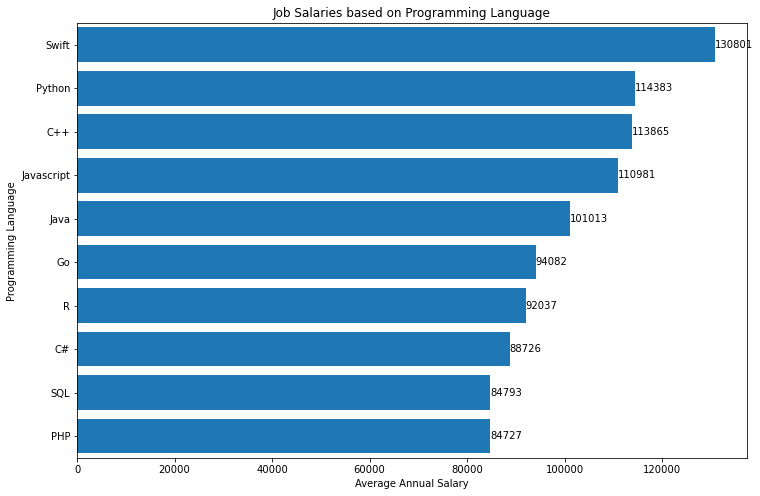

In [57]:
#plot for final presentation
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ax = df2.plot(kind='barh', x='Language', y='Average Annual Salary', figsize=(12,8), legend=False)
#ax = df2[['Language', 'Average Annual Salary']].plot(kind='barh', figsize=(10,7), legend=False)
ax.set_title('Job Salaries based on Programming Language')
ax.set_xlabel('Average Annual Salary')
ax.set_ylabel('Programming Language')
bars = plt.barh(df2['Language'], df2['Average Annual Salary'])
ax.bar_label(bars)
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01).
